In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from scipy.stats import multivariate_normal

# Zadanie
Proszę wygenerować dane tak by 1. i 3. współrzędna były skorelowane a pozostałe nie.
Proszę zwizualizować tą zależność za pomocą 

- sns.pairplot
- sns.heatmap

Genereuje punkty:

In [2]:
n = 1000
x1 = stats.norm(0, 1).rvs(n)
x2 = stats.norm(0, 1).rvs(n)
x3 = 2 * x1
x4 = stats.norm(0, 1).rvs(n)
X = np.stack((x1, x2, x3, x4), 1)

Rysuje punkty jako pray współrzednych: 

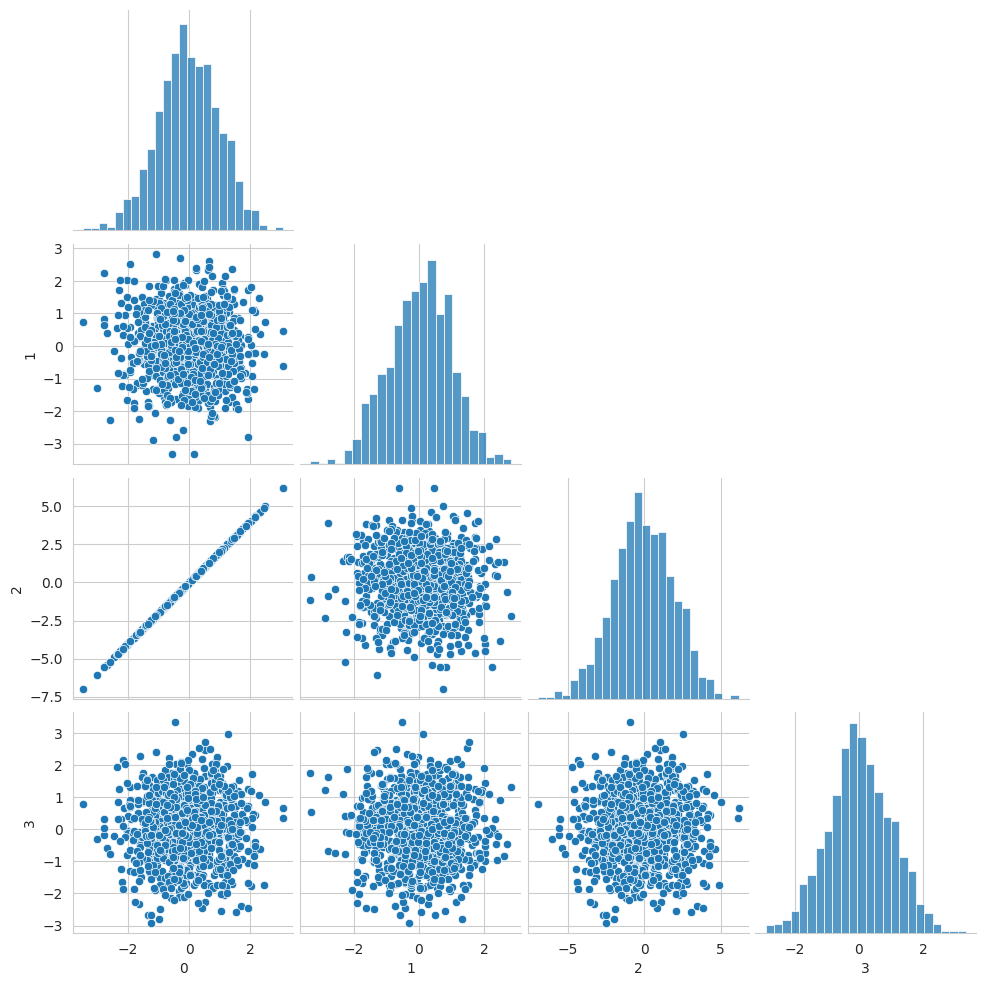

In [3]:
df = pd.DataFrame(X)
sns.pairplot(df, corner=True)  #, kind="reg"
plt.show()

Rysuję macierz korelacji za pomocą <tt>heatmap</tt>.

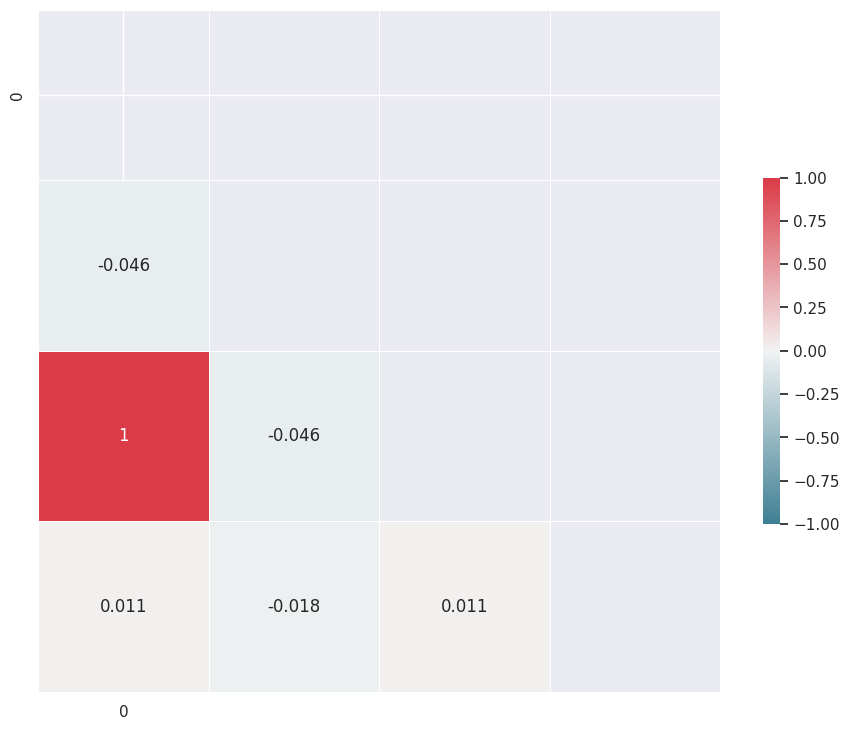

,0,1,2,3
0,1.000000,-0.045834,1.000000,0.011344
1,-0.045834,1.000000,-0.045834,-0.017539
2,1.000000,-0.045834,1.000000,0.011344
3,0.011344,-0.017539,0.011344,1.000000


In [4]:
sns.set(style="darkgrid")

corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, annot=True)
plt.show()
corr

# Zadanie
Wygeneruj dane 10. wymiarowe tak by 

- 1 3 5 współrzedna były skorelowane ze sobą dodatnio
- 7 8 współrzedna były skorelowane ze sobą ujemnie
- pozostałe były nieskorelowane


In [5]:
n = 1000

X = np.stack(
    (
        x1 := stats.norm(0, 1).rvs(n),
        stats.norm(0, 1).rvs(n),
        x1 * 2,
        stats.norm(0, 1).rvs(n),
        x1 * 4,
        stats.norm(0, 1).rvs(n),
        x7 := stats.norm(0, 1).rvs(n),
        -x7 - 10,
        stats.norm(0, 1).rvs(n),
        stats.norm(0, 1).rvs(n)
    ), 
    1
)

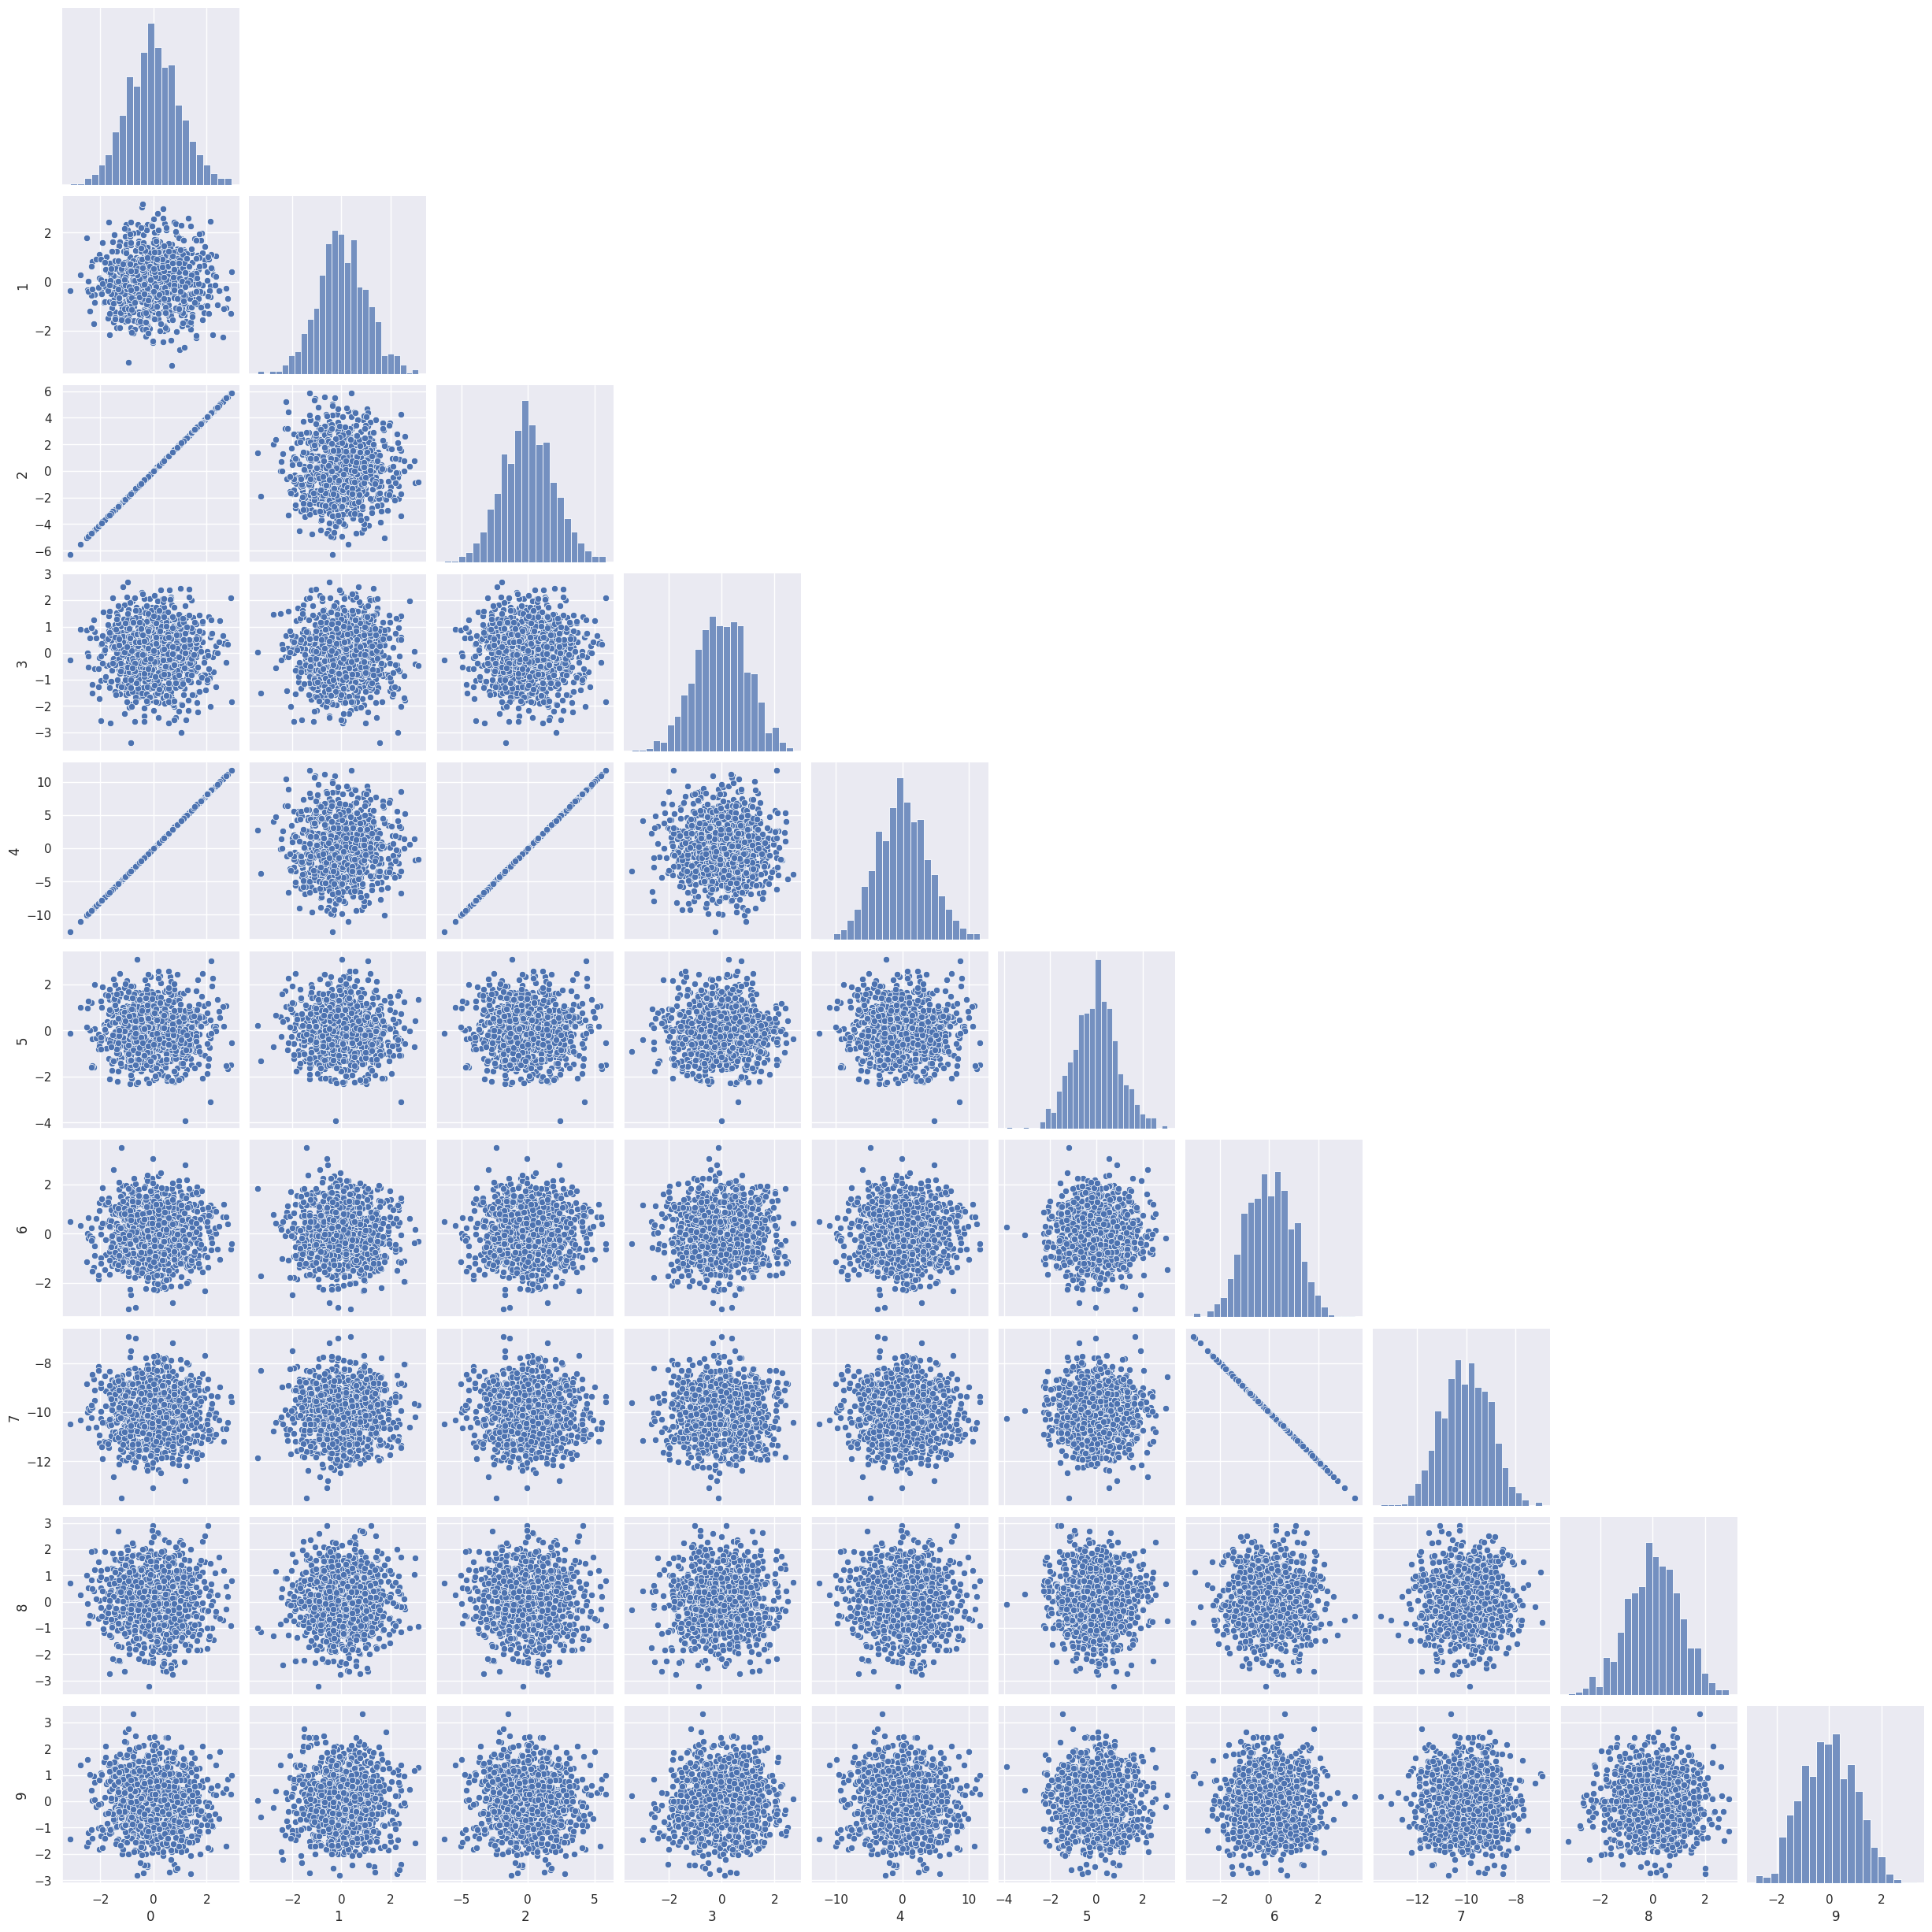

In [6]:
df = pd.DataFrame(X)
sns.pairplot(df, corner=True)  #, kind="reg"
plt.show()

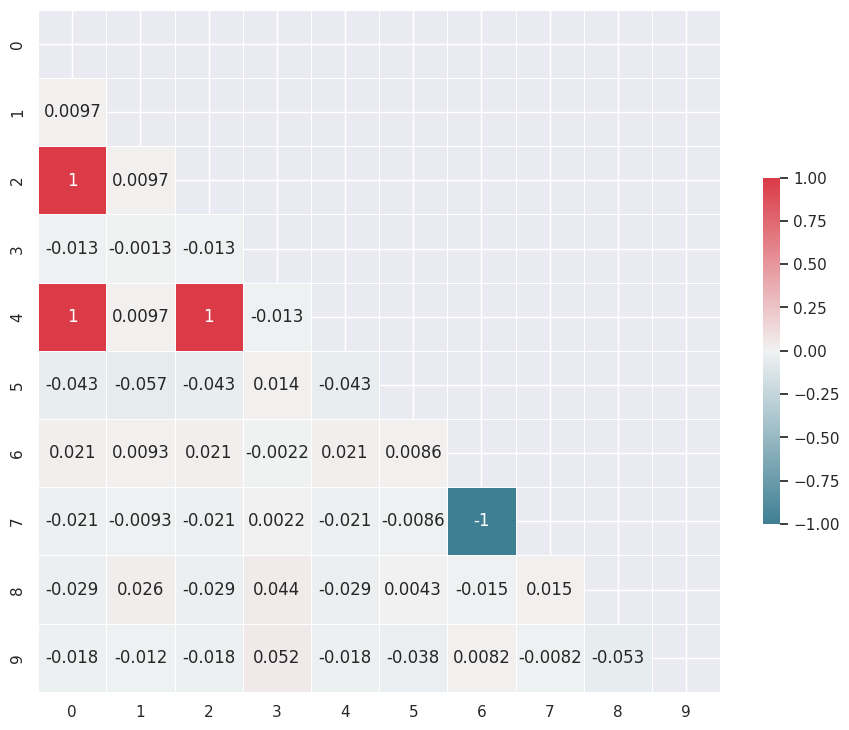

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.009685,1.000000,-0.012610,1.000000,-0.042639,0.021276,-0.021276,-0.028590,-0.018431
1,0.009685,1.000000,0.009685,-0.001319,0.009685,-0.057330,0.009341,-0.009341,0.025535,-0.011892
2,1.000000,0.009685,1.000000,-0.012610,1.000000,-0.042639,0.021276,-0.021276,-0.028590,-0.018431
3,-0.012610,-0.001319,-0.012610,1.000000,-0.012610,0.014181,-0.002230,0.002230,0.044473,0.052372
4,1.000000,0.009685,1.000000,-0.012610,1.000000,-0.042639,0.021276,-0.021276,-0.028590,-0.018431
5,-0.042639,-0.057330,-0.042639,0.014181,-0.042639,1.000000,0.008576,-0.008576,0.004342,-0.038436
6,0.021276,0.009341,0.021276,-0.002230,0.021276,0.008576,1.000000,-1.000000,-0.015473,0.008196
7,-0.021276,-0.009341,-0.021276,0.002230,-0.021276,-0.008576,-1.000000,1.000000,0.015473,-0.008196
8,-0.028590,0.025535,-0.028590,0.044473,-0.028590,0.004342,-0.015473,0.015473,1.000000,-0.052892
9,-0.018431,-0.011892,-0.018431,0.052372,-0.018431,-0.038436,0.008196,-0.008196,-0.052892,1.000000


In [7]:
sns.set(style="darkgrid")

corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, annot=True)
plt.show()
corr

# Zad 
Dodaj kilka współrzednych tak by były skorelowanie nieliniowo np. $x^2$
* czy widać jakiś efekt na heat map

In [8]:
n = 1000

X = np.stack(
    (
        x1 := stats.norm(0, 1).rvs(n),
        stats.norm(0, 1).rvs(n),
        x1 * 2,
        stats.norm(0, 1).rvs(n),
        x1 * 4,
        stats.norm(0, 1).rvs(n),
        x7 := stats.norm(0, 1).rvs(n),
        -x7 - 10,
        stats.norm(0, 1).rvs(n),
        stats.norm(0, 1).rvs(n),
        x1**2,
        x1**5
    ), 
    1
)

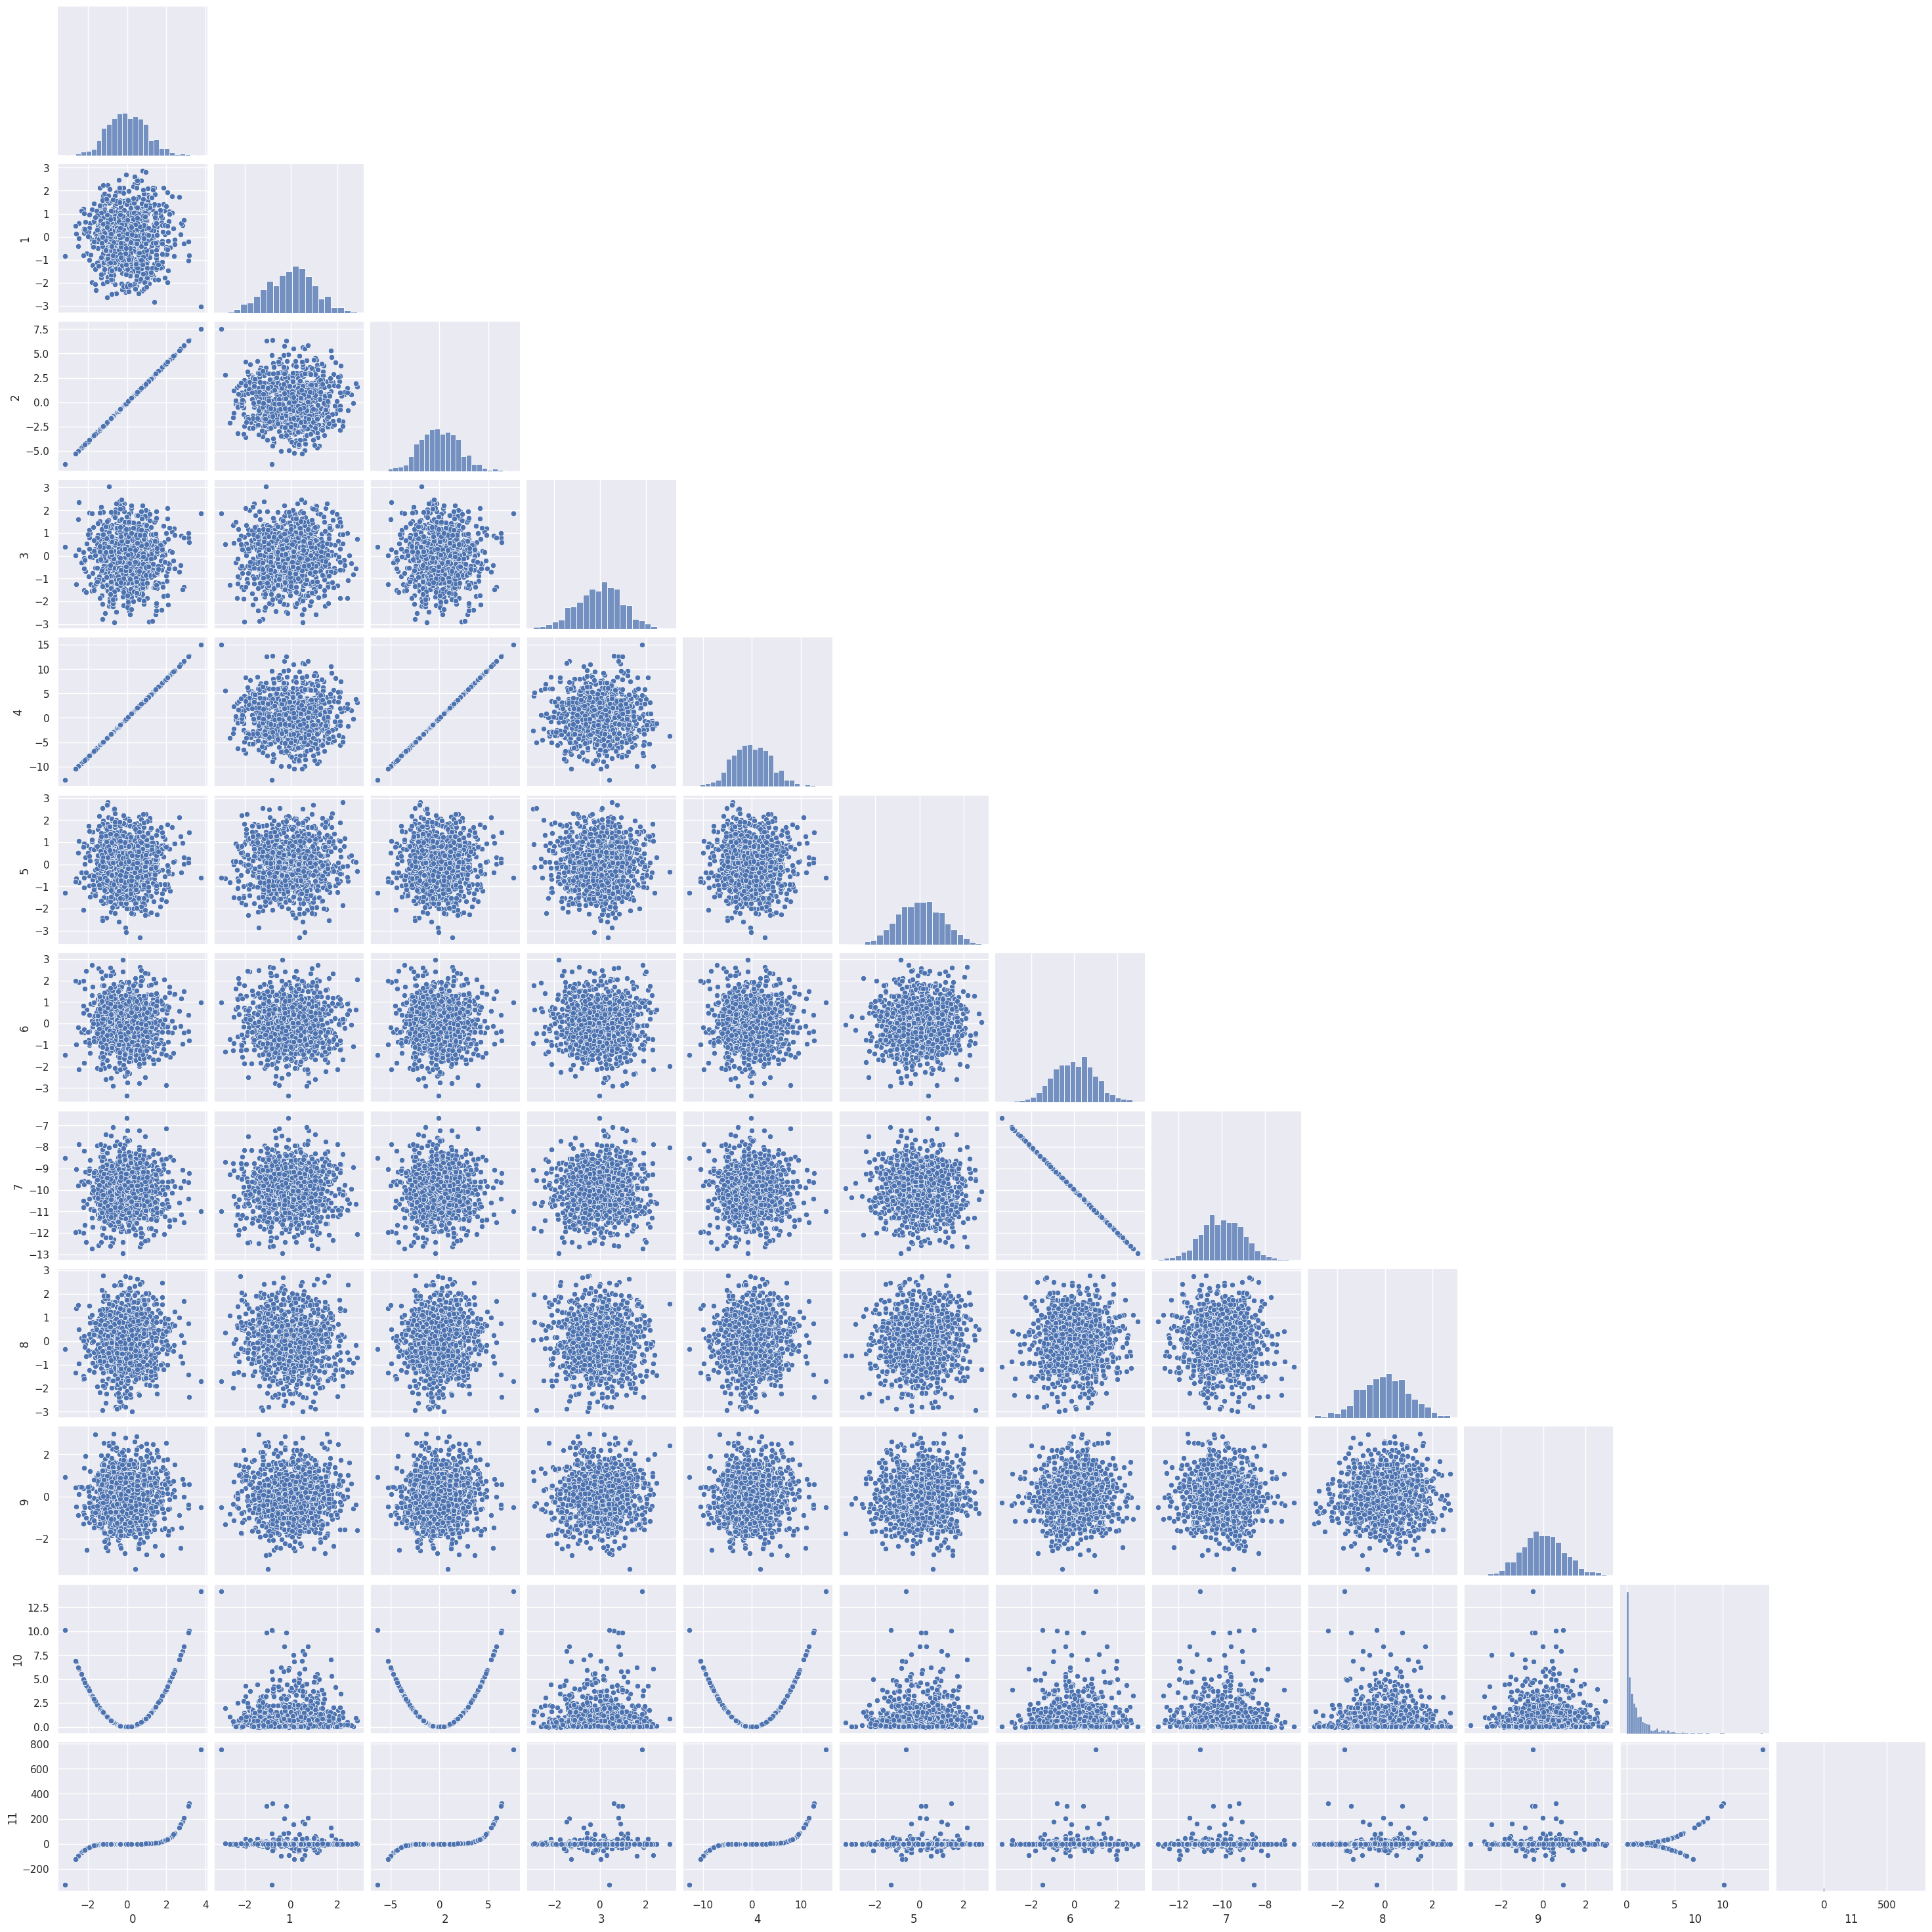

In [9]:
df = pd.DataFrame(X)
sns.pairplot(df, corner=True)  #, kind="reg"
plt.show()

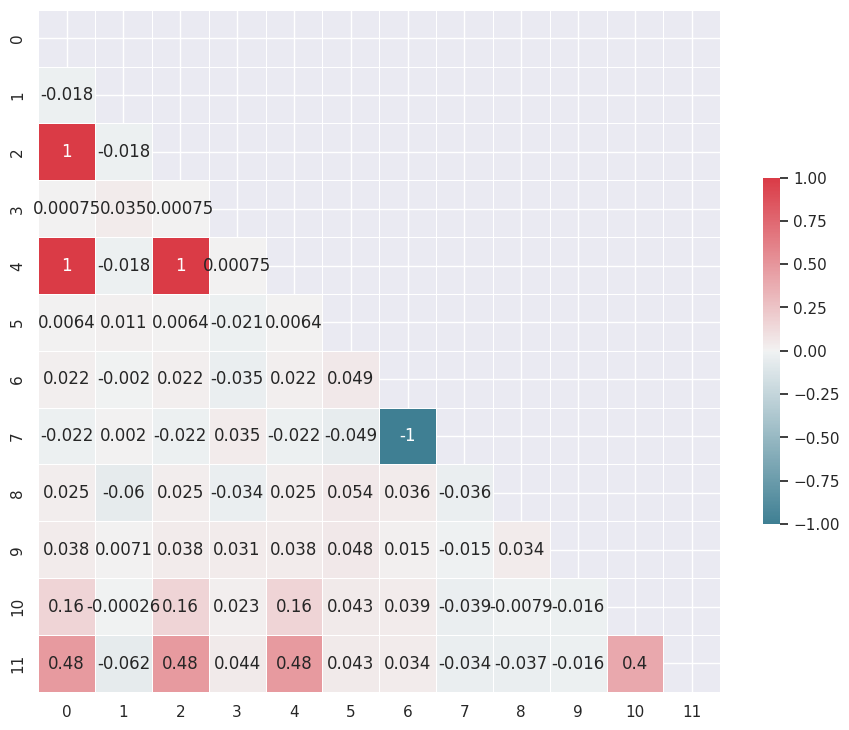

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.000000,-0.017593,1.000000,0.000751,1.000000,0.006385,0.022225,-0.022225,0.024523,0.037597,0.159245,0.482103
1,-0.017593,1.000000,-0.017593,0.034540,-0.017593,0.010673,-0.002013,0.002013,-0.059879,0.007139,-0.000262,-0.062270
2,1.000000,-0.017593,1.000000,0.000751,1.000000,0.006385,0.022225,-0.022225,0.024523,0.037597,0.159245,0.482103
3,0.000751,0.034540,0.000751,1.000000,0.000751,-0.020885,-0.034683,0.034683,-0.034483,0.031272,0.023319,0.044086
4,1.000000,-0.017593,1.000000,0.000751,1.000000,0.006385,0.022225,-0.022225,0.024523,0.037597,0.159245,0.482103
5,0.006385,0.010673,0.006385,-0.020885,0.006385,1.000000,0.048667,-0.048667,0.053784,0.048113,0.043121,0.043251
6,0.022225,-0.002013,0.022225,-0.034683,0.022225,0.048667,1.000000,-1.000000,0.035971,0.015476,0.038813,0.033821
7,-0.022225,0.002013,-0.022225,0.034683,-0.022225,-0.048667,-1.000000,1.000000,-0.035971,-0.015476,-0.038813,-0.033821
8,0.024523,-0.059879,0.024523,-0.034483,0.024523,0.053784,0.035971,-0.035971,1.000000,0.033839,-0.007867,-0.036772
9,0.037597,0.007139,0.037597,0.031272,0.037597,0.048113,0.015476,-0.015476,0.033839,1.000000,-0.015870,-0.016454


In [10]:
sns.set(style="darkgrid")

corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, annot=True)
plt.show()
corr

# Zadanie
Wykonaj wykresy
- sns.pairplot
- sns.heatmap

dla poniższego zbioru danych


In [11]:
from sklearn.datasets import load_iris

iris = load_iris()
data = iris.data

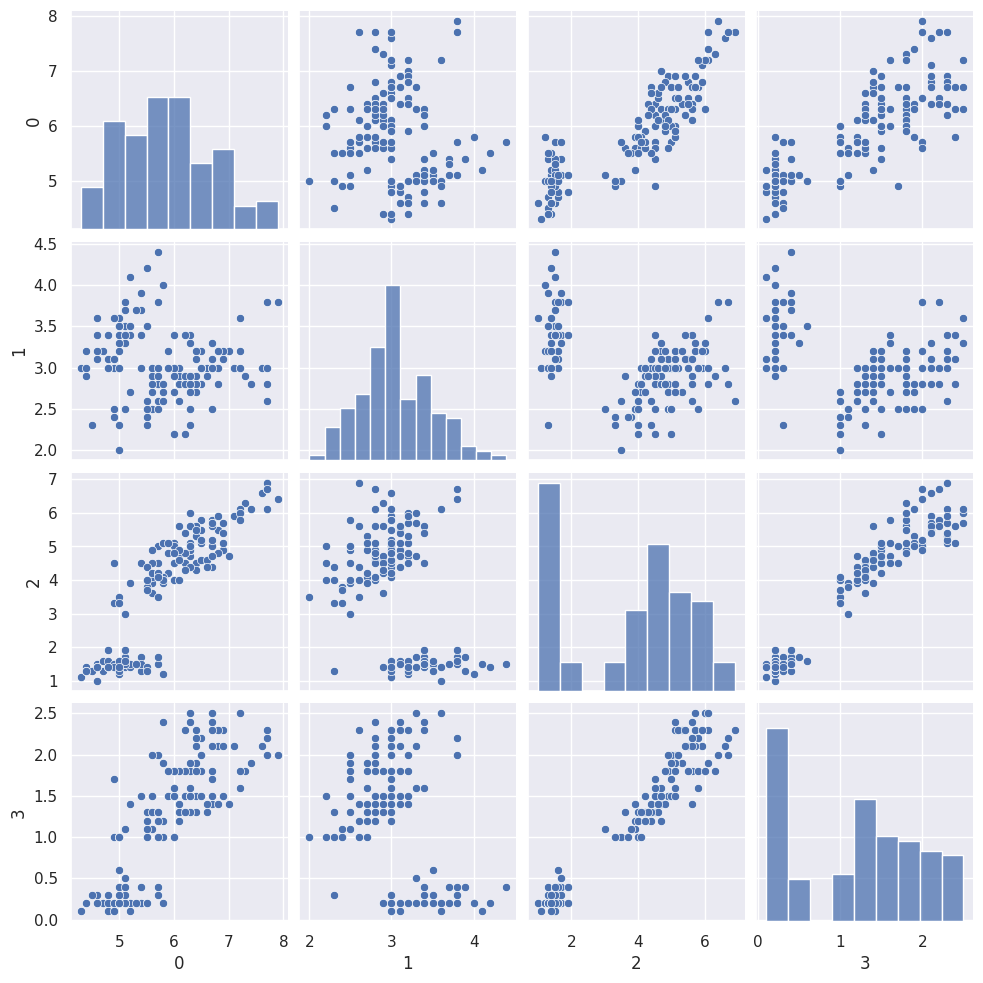

In [12]:
sns.pairplot(pd.DataFrame(data))

<Axes: >

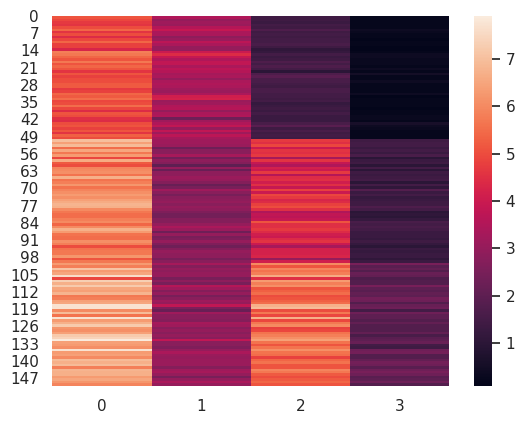

In [13]:
sns.heatmap(pd.DataFrame(data))